#Stock Market Analysis And Forecating

A stock market, equity market, or share market is the aggregation of buyers and sellers of stocks (also called shares), which represent ownership claims on businesses; these may include securities listed on a public stock exchange, as well as stock that is only traded privately, such as shares of private companies which are sold to investors through equity crowdfunding platforms. Investment in the stock market is most often done via stockbrokerages and electronic trading platforms. Investment is usually made with an investment strategy in mind.

The task of stock prediction has always been a challenging problem for statistics experts and nance. The main reason behind this prediction is buying stocks that are likely to increase in price and then selling stocks that are probably to fall. Generally, there are two ways for stock market prediction. Fundamental analysis is one of them and relies on a company's technique and fundamental information like market position, expenses and annual growth rates. The second one is the technical analysis method, which concentrates on previous stock prices and values.

In the first part of our project, we will try to analyze the data. and in the second part, we will forecast the stock market.

##Dataset
1. Amazon
2. Apple
3. Google
4. IBM
5. Microsoft

##Analysis
We will find the distribution of close and open. Then we will find the correlation between close and open. After that, we will visualize the attributes[Open, High, Low, Close, volume] of our datasets. Then we compare the "High" and "Close" of each datasets. At last, we will find the trend and seasonality in the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IBM_2006_2018.csv to IBM_2006_2018.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
amazon = pd.read_csv('/content/AMZN_1999_2022.csv', index_col = 'Date',  parse_dates = ['Date'], dayfirst = True)
amazon.head()

,Open,High,Low,Close,Volume
Date,,,,,
1999-01-04,2.730729,2.966667,2.665625,2.957813,785844000
1999-01-05,2.739063,3.243750,2.662500,3.112500,1257464000
1999-01-06,3.409375,3.509375,3.350000,3.450000,723532000
1999-01-07,3.428125,4.006250,3.325000,3.971875,945492000
1999-01-08,4.606250,4.978125,3.800000,4.006250,1333244000


In [ ]:
apple = pd.read_csv('/content/APPL_1980_2022.csv', index_col='Date', parse_dates=['Date'], dayfirst = True)
apple.head()

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600


In [ ]:
google = pd.read_csv('/content/GOOGL_2004_2022.csv', index_col='Date', parse_dates=['Date'], dayfirst = True)
google.head()

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,22834343
2004-08-23,55.430431,56.796799,54.579578,54.754753,18256126
2004-08-24,55.675674,55.855858,51.836838,52.487488,15247337
2004-08-25,52.532532,54.054054,51.991993,53.053055,9188602


In [ ]:
ibm = pd.read_csv('/content/IBM_2006_2018.csv', index_col='Date', parse_dates=['Date'], dayfirst = True)
ibm.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200
2006-01-04,82.20,82.50,81.33,81.95,9840600
2006-01-05,81.40,82.90,81.00,82.50,7213500
2006-01-06,83.95,85.03,83.41,84.95,8197400
2006-01-09,84.10,84.25,83.38,83.73,6858200


In [ ]:
microsoft = pd.read_csv('/content/MSFT_1986_2022.csv', index_col='Date', parse_dates=['Date'], dayfirst = True)
microsoft.head()

,Open,High,Low,Close,Volume
Date,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,47894400


In [ ]:
amazon.describe()

,Open,High,Low,Close,Volume
count,6039.000000,6039.000000,6039.000000,6039.000000,6.039000e+03
mean,33.032739,33.424013,32.598322,33.016059,1.334297e+08
std,48.808735,49.374865,48.170554,48.767219,1.147912e+08
min,0.295500,0.305000,0.275500,0.298500,1.762600e+07
25%,2.267000,2.303500,2.226000,2.264250,6.955200e+07
50%,8.675000,8.758500,8.576500,8.685500,1.054160e+08
75%,41.047501,41.131498,40.737999,40.933750,1.560990e+08
max,187.199997,188.654007,184.839493,186.570496,2.086584e+09


After describing the amazon dataset, there is a high difference between the minimum and maximum values. And 75% of the value is close to the mean.

In [ ]:
amazon.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6039 entries, 1999-01-04 to 2022-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6039 non-null   float64
 1   High    6039 non-null   float64
 2   Low     6039 non-null   float64
 3   Close   6039 non-null   float64
 4   Volume  6039 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 283.1 KB


In [ ]:
amazon.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [ ]:
apple.describe()

,Open,High,Low,Close,Volume
count,10468.000000,10468.000000,10468.000000,10468.000000,1.046800e+04
mean,14.757987,14.921491,14.594484,14.763533,3.308489e+08
std,31.914174,32.289158,31.543959,31.929489,3.388418e+08
min,0.049665,0.049665,0.049107,0.049107,0.000000e+00
25%,0.283482,0.289286,0.276786,0.283482,1.237768e+08
50%,0.474107,0.482768,0.465960,0.475446,2.181592e+08
75%,14.953303,15.057143,14.692589,14.901964,4.105794e+08
max,182.630005,182.940002,179.119995,182.009995,7.421641e+09


Also same for the Apple dataset, there is a high difference between the minimum and maximum values. And 75% of the value is close to the mean.



In [ ]:
apple.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10468 entries, 1980-12-12 to 2022-06-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    10468 non-null  float64
 1   High    10468 non-null  float64
 2   Low     10468 non-null  float64
 3   Close   10468 non-null  float64
 4   Volume  10468 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 490.7 KB


In [ ]:
apple.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [ ]:
google.describe()

,Open,High,Low,Close,Volume
count,4431.000000,4431.000000,4431.000000,4431.000000,4.431000e+03
mean,693.087345,699.735595,686.078751,693.097367,6.444992e+06
std,645.118799,651.331215,638.579488,645.187806,7.690351e+06
min,49.644646,50.920921,48.028027,50.055054,4.656000e+05
25%,248.558563,250.853355,245.813309,248.415916,1.695600e+06
50%,434.924927,437.887878,432.687683,435.330322,3.778418e+06
75%,1007.364990,1020.649994,997.274994,1007.790008,8.002390e+06
max,3025.000000,3030.929932,2977.979980,2996.770020,8.215117e+07


For the Google dataset, there is a high difference between the minimum and maximum values. And 50% of the value is close to the mean.

In [ ]:
google.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4431 entries, 2004-08-19 to 2022-03-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4431 non-null   float64
 1   High    4431 non-null   float64
 2   Low     4431 non-null   float64
 3   Close   4431 non-null   float64
 4   Volume  4431 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 207.7 KB


In [ ]:
google.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [ ]:
ibm.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3020.000000,3019.000000,3020.000000,3.020000e+03
mean,145.515545,146.681738,144.471597,145.617278,5.773301e+06
std,37.554946,37.613446,37.477641,37.529387,3.192831e+06
min,72.740000,73.940000,69.500000,71.740000,2.542560e+05
25%,116.405000,117.765000,115.490000,116.525000,3.622681e+06
50%,149.610000,150.330000,148.470000,149.315000,4.928852e+06
75%,178.445000,179.762500,177.330000,178.685000,6.965014e+06
max,215.380000,215.900000,214.300000,215.800000,3.077428e+07


But for the IBM dataset, we can see all the value is nearly close to the mean.

In [ ]:
ibm.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3020 entries, 2006-01-03 to 2017-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3020 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3020 non-null   float64
 4   Volume  3020 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 141.6 KB


In [ ]:
ibm.isna().sum()

,0
Open,1
High,0
Low,1
Close,0
Volume,0


In [ ]:
ibm.dropna(inplace=True)

In [ ]:
ibm.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [ ]:
microsoft.describe()

,Open,High,Low,Close,Volume
count,9083.000000,9083.000000,9083.000000,9083.000000,9.083000e+03
mean,41.324936,41.760887,40.878488,41.335628,5.875055e+07
std,59.696905,60.272218,59.081728,59.714567,3.845200e+07
min,0.088542,0.092014,0.088542,0.090278,2.304000e+06
25%,4.050781,4.102051,4.027344,4.075195,3.461230e+07
50%,26.820000,27.100000,26.520000,26.840000,5.203200e+07
75%,40.034999,40.443751,39.500000,39.937500,7.265400e+07
max,344.619995,349.670013,342.200012,343.109985,1.031789e+09


Also same for the Microsoft dataset, there is a high difference between the minimum and maximum values. And 75% of the value is close to the mean.

In [ ]:
microsoft.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9083 entries, 1986-03-13 to 2022-03-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    9083 non-null   float64
 1   High    9083 non-null   float64
 2   Low     9083 non-null   float64
 3   Close   9083 non-null   float64
 4   Volume  9083 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 425.8 KB


In [ ]:
microsoft.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [ ]:
fig = px.histogram(google,
                   x='Close',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Close')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(google,
                   x='Open',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of open')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.scatter(google,
                 x='Open',
                 y='Close',

                 opacity=0.8,

                 title='Open vs. Close')
fig.update_traces(marker_size=5)
fig.show()

There is a very high correlation between "Open" and "Close" as we can see from the scatter plot.

In [ ]:
google.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999915,0.999902,0.999808,-0.453884
High,0.999915,1.000000,0.999877,0.999903,-0.452855
Low,0.999902,0.999877,1.000000,0.999914,-0.455447
Close,0.999808,0.999903,0.999914,1.000000,-0.454252
Volume,-0.453884,-0.452855,-0.455447,-0.454252,1.000000


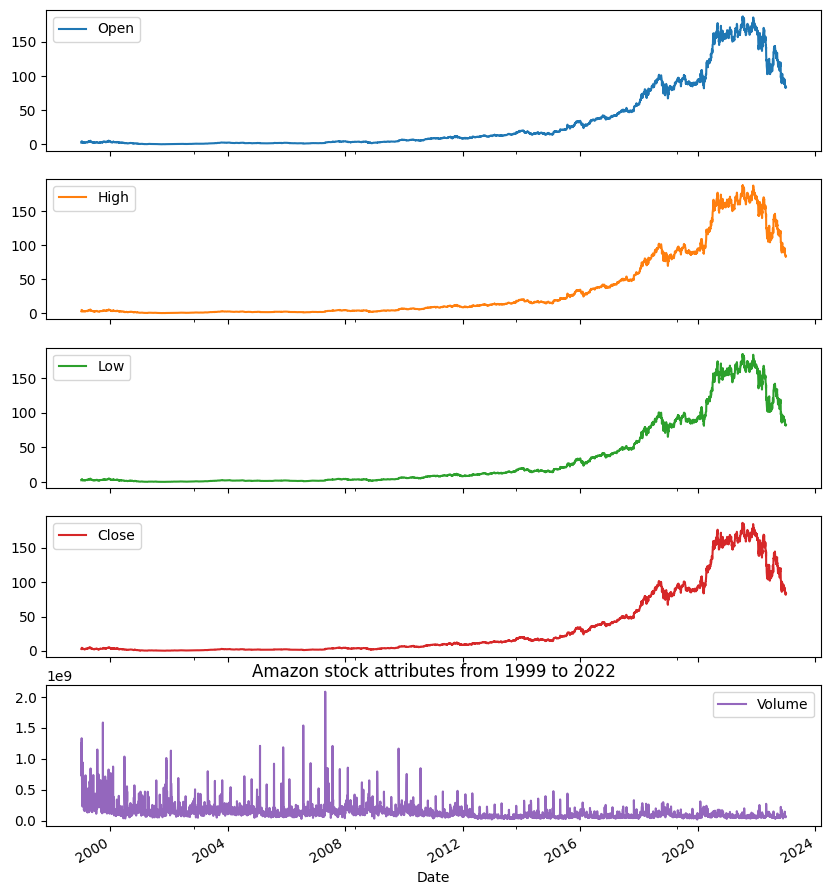

In [ ]:
amazon['1999':'2022'].plot(subplots=True, figsize=(10,12))
plt.title('Amazon stock attributes from 1999 to 2022')
plt.show()

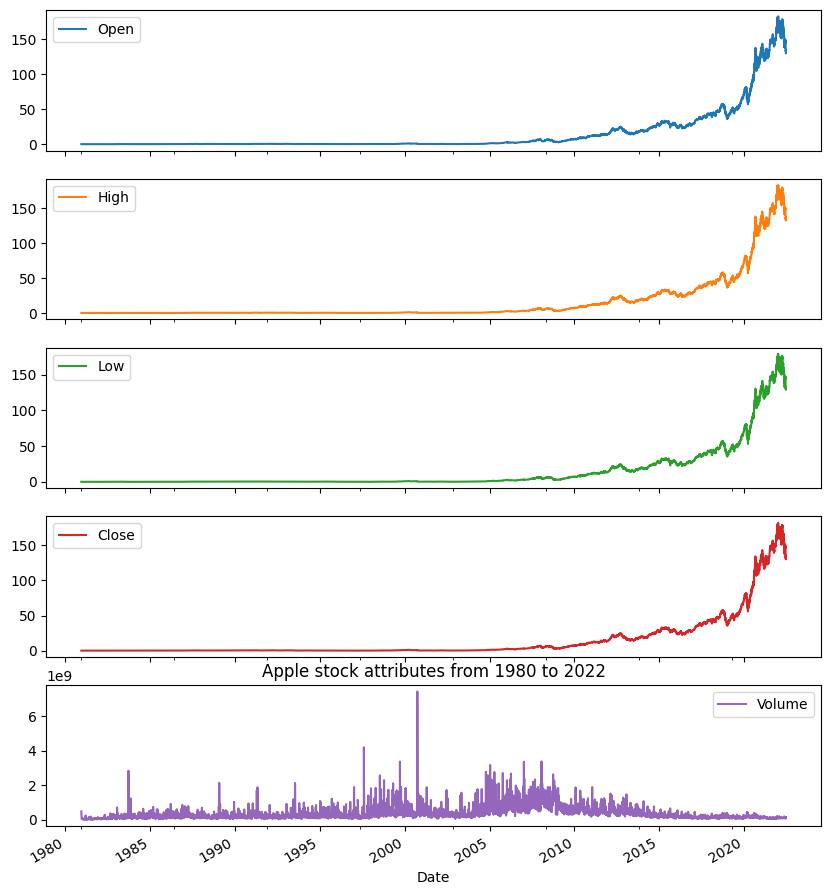

In [ ]:
apple['1980':'2022'].plot(subplots=True, figsize=(10,12))
plt.title('Apple stock attributes from 1980 to 2022')
plt.show()

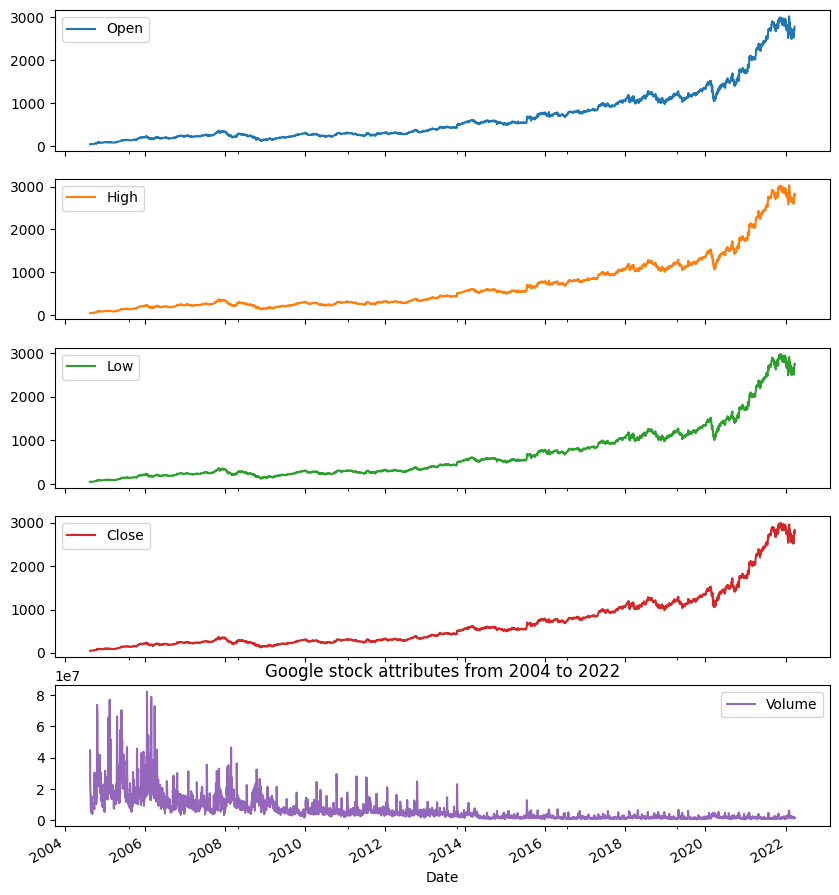

In [ ]:
google['2004':'2022'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2004 to 2022')
plt.show()

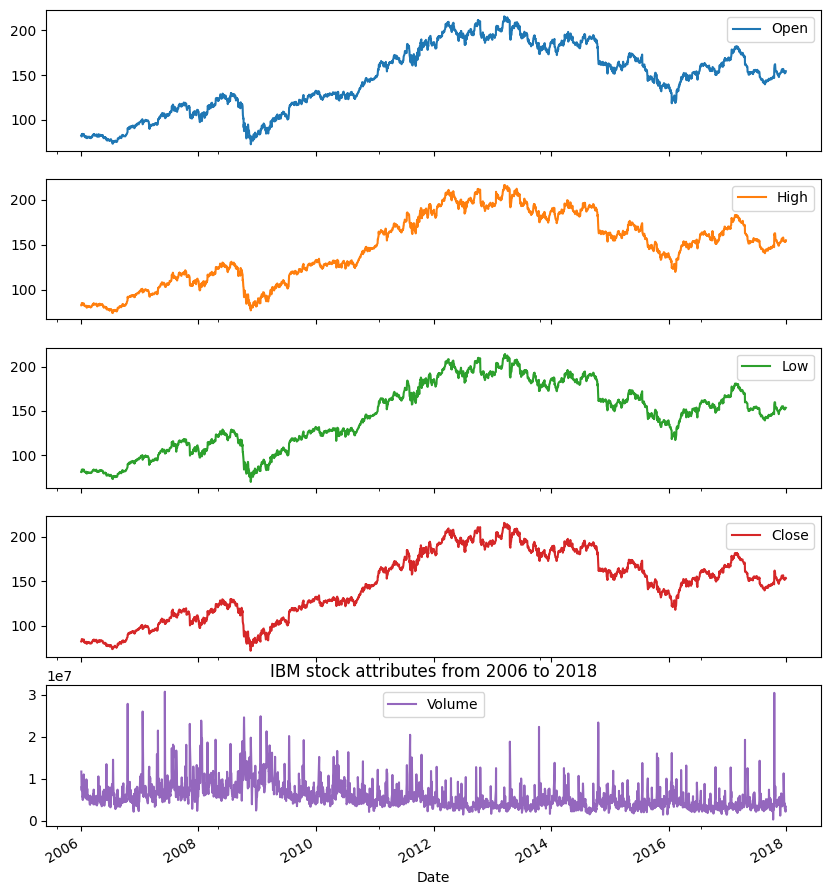

In [ ]:
ibm['2006':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('IBM stock attributes from 2006 to 2018')
plt.show()

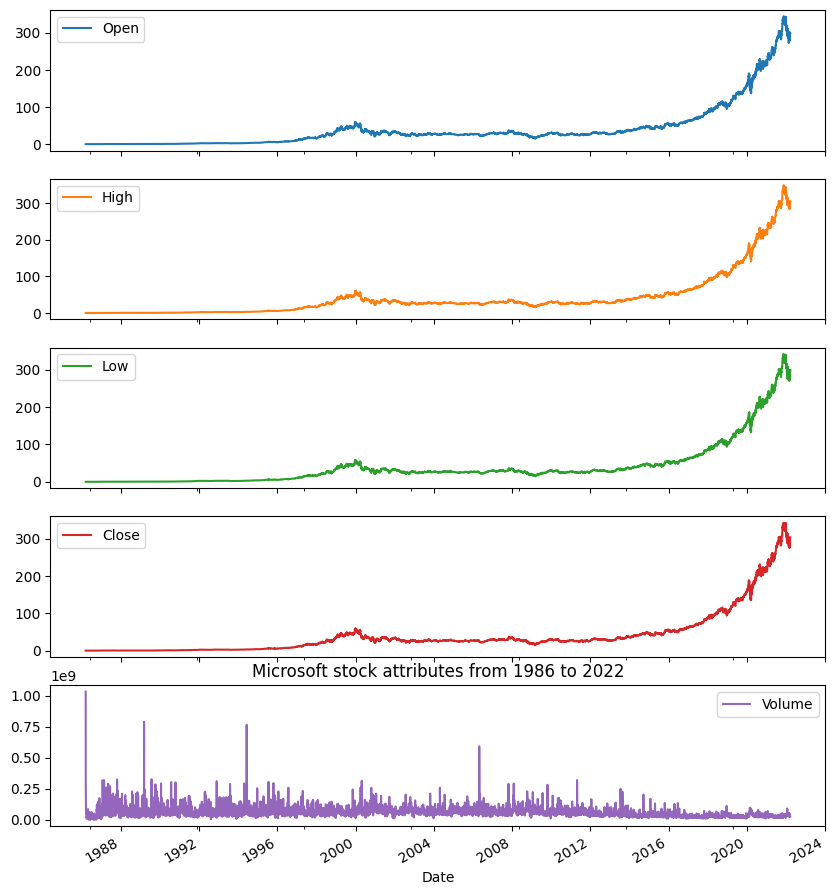

In [ ]:
microsoft['1986':'2022'].plot(subplots=True, figsize=(10,12))
plt.title('Microsoft stock attributes from 1986 to 2022')
plt.show()

##High Plot

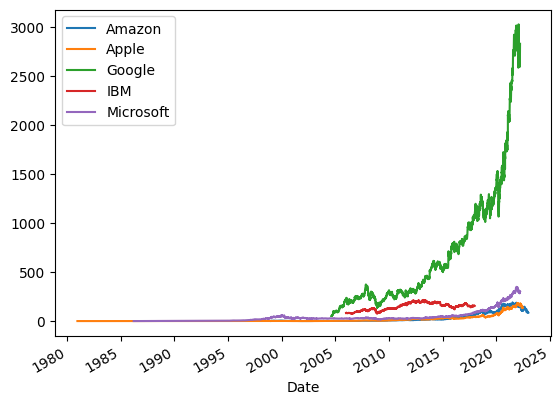

In [ ]:
# Plotting before normalization
amazon.High.plot()
apple.High.plot()
google.High.plot()
ibm.High.plot()
microsoft.High.plot()
plt.legend(['Amazon','Apple','Google','IBM','Microsoft'])
plt.show()


Amazon's "High" value started modestly but rose exponentially after 2012.
It surpassed IBM by a wide margin and overtook Google after 2016. By 2018, Amazon's "High" value surged ahead, establishing itself as a dominant player.

Apple's "High" value followed an upward trajectory similar to Amazon's, though its growth was more consistent and less dramatic. After 2016, Apple's "High" value rose sharply, placing it in close competition with Google and Amazon.

Google’s "High" value showed steady growth, similar to Microsoft, but with a more pronounced upward trend. It maintained its lead until around 2016 when Amazon started challenging its dominance. By 2018, Google’s "High" value was surpassed by Amazon, although it continued to grow.

IBM’s "High" value began at a similar level to Amazon and Apple. After 2012, IBM experienced a slight decline, unlike Amazon and Apple, which saw significant growth.

Microsoft’s "High" value displayed consistent, gradual growth over the years, reflecting a steady increase.